In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
### DATA IMPORT AND FILTERING
columnsTBImported = ['SubjID', 'TrialID', "DepthID", 'Level', "TOTAL_TIME", "VIEW_TIME", "SOL_LENGHT", "N_BACKTRACK", "SUCCESSFUL", "DIFF_FROM_OPTIMAL_LENGHT" ]
df = pd.read_csv("SynopticDataframe2.csv", usecols=columnsTBImported)
cond0    = df["Level"] < 4 #Exlcude the free session
cond1    = df["Level"] > 0 #Exclude the training session
cond2    = df["TOTAL_TIME"] > 0 
cond2bis = df["VIEW_TIME"]> 0
cond3    = df["SOL_LENGHT"] > 0
cond4    = df["N_BACKTRACK"] < 30
df_red   = df[cond0 & cond1 & cond2 & cond2bis & cond3 & cond4].reset_index(drop = True)
#Consider only subjects with more than 80 valid trials
df_red = df_red.groupby("SubjID").filter(lambda x: len(x)>80).reset_index()

##  FIGURE 2: SUCCESS PROBABILITY

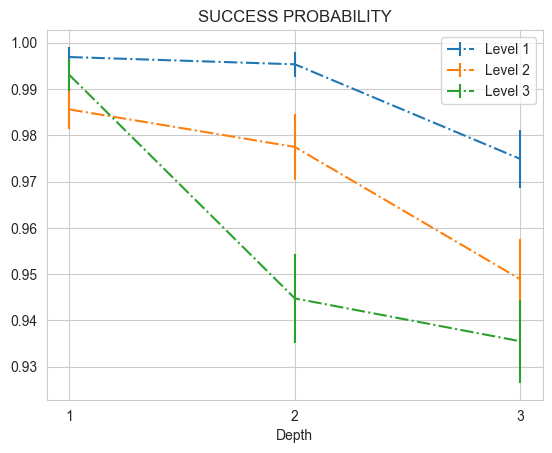

In [22]:
# Group by "Level" and "DepthID"
df_group = df_red.groupby(["Level", "DepthID"])
plt.xticks([1, 2, 3])

for lv in [1, 2, 3]:
    medie = df_group.SUCCESSFUL.value_counts(normalize=True).loc[[lv]].values[list((0, 2, 4))]
    groupSieze = [df_group.SUCCESSFUL.value_counts().loc[lv, depth].sum() for depth in range(1,4)]
    sem = np.sqrt(medie * (1 - medie)/ groupSieze)
    plt.errorbar(x=[1, 2, 3], y=medie, yerr=sem, ls="dashdot", label="Level " + str(lv))

plt.xlabel("Depth")
plt.legend()
plt.title("SUCCESS PROBABILITY")
#plt.savefig("./IMAGES/Figure2.png", dpi = 300)
plt.show()

#### SUCCESS PROBABILITY

In [4]:
dfLogit = df_red[["Level", "DepthID", "SUCCESSFUL", "SubjID"]].copy()
dfLogit["SUCCESSFUL"] = dfLogit["SUCCESSFUL"].astype(int)
dfLogit.to_csv("dfLogit.csv", index=False)

##  FIGURE 3:  TOTAL TIME

In [5]:
dfTime = df_red[["Level", "DepthID", "TOTAL_TIME", "SubjID"]].copy()
dfTime.to_csv("dfTime.csv", index=False)

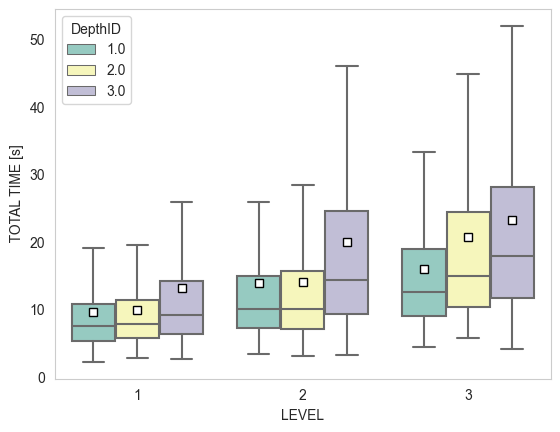

In [6]:
#BOXPLOT
# Make sure 'DepthID' and 'Level' are categorical variables
dfTime['DepthID'] = dfTime['DepthID'].astype('category')
dfTime['Level'] = dfTime['Level'].astype('category')
sns.set_style("whitegrid")
sns.boxplot(x='Level', y='TOTAL_TIME', data=dfTime, hue='DepthID', dodge=True, showfliers=False, palette="Set3", showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
# Set labels and title
plt.xlabel('LEVEL')
plt.ylabel(' TOTAL TIME [s]')
plt.grid(False)
#save the plot
plt.savefig("./IMAGES/Figure3.png", dpi = 300)
#Show the plot
plt.show()

##  FIGURE 4: NUMBER OF BACKTRACK 

In [7]:
dfBacktrack = df_red[["Level", "DepthID", "N_BACKTRACK", "SubjID"]].copy()
dfBacktrack["N_BACKTRACK"] = dfBacktrack["N_BACKTRACK"].astype(int)
dfBacktrack.to_csv("dfBacktrack.csv", index=False)

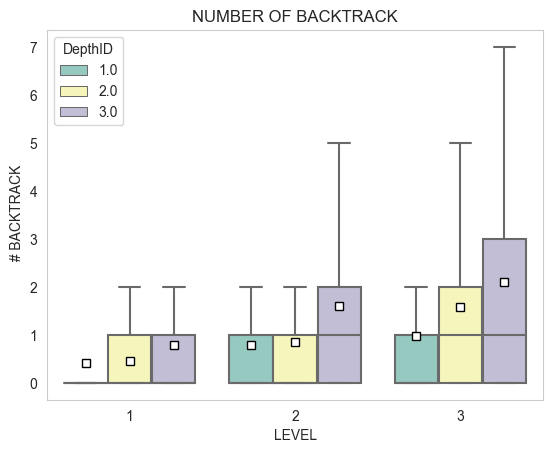

In [8]:
# Make sure 'DepthID' and 'Level' are categorical variables
dfBacktrack['DepthID'] = dfBacktrack['DepthID'].astype('category')
dfBacktrack['Level'] = dfBacktrack['Level'].astype('category')
#BOXPLOT
sns.set_style("whitegrid")
sns.boxplot(x='Level', y='N_BACKTRACK', data=dfBacktrack, hue='DepthID', dodge=True, showfliers=False, palette="Set3", showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
# Set labels and title
plt.xlabel('LEVEL')
plt.ylabel(' # BACKTRACK')
plt.title('NUMBER OF BACKTRACK')
plt.grid(False)
#Save the plot
plt.savefig("./IMAGES/Figure4.png", dpi = 300)
# Show the plot
plt.show()


## VIEW TIME

In [5]:
dfViewTime = df_red[["Level", "DepthID", "VIEW_TIME", "SubjID"]].copy()
dfViewTime.to_csv("dfViewTime.csv", index=False)

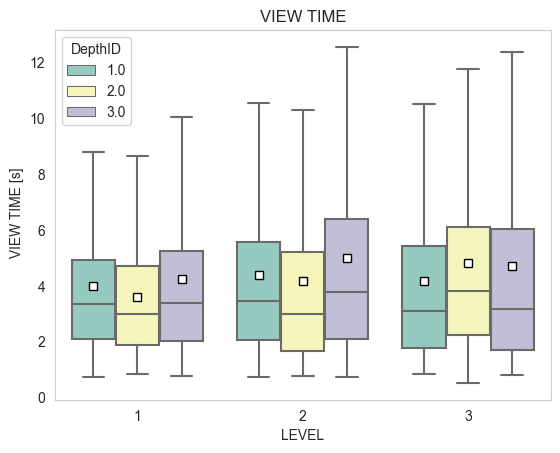

In [6]:
# Make sure 'DepthID' and 'Level' are categorical variables
dfViewTime['DepthID'] = dfViewTime['DepthID'].astype('category')
dfViewTime['Level'] = dfViewTime['Level'].astype('category')
#BOXPLOT
sns.set_style("whitegrid")
sns.boxplot(x='Level', y='VIEW_TIME', data=dfViewTime, hue='DepthID', dodge=True, showfliers=False, palette="Set3", showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
# Set labels and title
plt.xlabel('LEVEL')
plt.ylabel(' VIEW TIME [s]')
plt.title('VIEW TIME')
plt.grid(False)
#Save the plot
plt.savefig("./IMAGES/FigureS16.png", dpi = 300)
# Show the plot
plt.show()